<a href="https://colab.research.google.com/github/JonathanDavid29/Cyclistic-Analysis-EDA-/blob/main/Cyclistic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

☝ Click here to open the notebook in Colab to view the complete visualizations.

**Analysis performed by Jonathan.**

16/10/2023

#Executive Summary



*   **Gender**
  *   Percentage of users divides by their gender:
     - Male 78.8% 🔰
     - Female 21.2% ⛔
  *   Number of user types divided by gender:
     * Subscriber:
     Female - 75,625k, Male - 281.483k 🔰
     * Customer:
     Male - 98
     * Dependent:
     Male - 4 ⛔
*   **Month**
  * Monthly Trips recorded:
     * January - 74061 ⛔
     * February - 142508 🔰
     * March - 140641
  * Distribution of Trips in February month: day 17-22, records more trips in that time period
*   **Days**
  * Top 3 days with most trips:
     * Tuesday - 61442 🔰
     * Wednesday - 59998
     * Friday - 60838
  * Top 3 days with less trips:
     * Thursday - 53200
     * Saturday - 32782 ⛔
     * Sunday - 31090
*   **Hours**
  * Hours with the highest number of trips:
     * 8 A.M. - 38008 trips
     * 4 P.M. - 36399 trips
     * 5 P.M. - 46959 trips 🔰
*   **Minutes**
  * Customer count by category according to service usage in minutes:
     * Subscriber... [0-300 minutes] - 356.955k trips 🔰, [1201-1500 minutes] - 18 trips
     * Customer... [0-125 minutes] - 97 🔰, [401-550 minutes] - 1
*   **Stations**
  * Top 3 stations:
   * Clinton St & Washington Blvd - 7437 trips 🔰
   * Clinton St & Madison St - 6079 trips
   * Canal St & Adams St - 5770 trips
________________________________________________________________________________

**Objective & Scope**
* Collect, clean & analyze Cyclistic dataset
* Identify variable of interest
* Allow businesses to make data-driven decisions based on the given dataset
* Share findings

**Methodology**
* Collect data using "Divvy_Trips_2017_Q1"
* Wrangle data using preprocessing, cleaning, transforming and organizing data for further analysis
* Explore data using available techniques

#1.0 Introduction

In 2016, **Cyclistic** launched a successful bike share offering. Since then, the program has grown to a fleet of 5,824 geotagged and locked bikes at a network of 692 stations **across Chicago**. Bikes can be unlocked at one station and returned to any other station in the system at any time.

Until now, Cyclistic's marketing strategy relied on general brand recognition and appealing to broad consumer segments. One of the approaches that helped make this possible **was the flexibility of its pricing plans**: single-ride passes, full-day passes, and annual passes. Customers who purchase single passes or day passes are referred to as occasional users. Customers who purchase annual passes are referred to as riders.

**Leading questions are:**


1.   What is the difference between annual members and occasional cyclists in the use of Cyclistic bicycles?
2.   Can we identify variables of interest to determine whether a conventional user is more likely to purchase a subscription?



In [1]:
import IPython.display as dsp
dsp.Image(url='https://brlsports.com/cdn/shop/articles/237422980_1200x.jpg?v=1666619288',height=300,width=500)

#2.0 Retrieving data

## 2.1 Load libraries

In [27]:
import pandas as pd #package for high-performance, easy-to-use data structures and data analysis
import numpy as np #fundamental package for scientific computing with Python

#libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import kaleido
%matplotlib inline

# Supress unnecessary warnings so our presentation will look clean
import warnings
warnings.filterwarnings("ignore")

##2.2 Read data

In [3]:
df = pd.read_csv('Divvy_Trips_2017_Q1.csv', encoding= 'ISO-8859-1')

#3.0 Data Overview

##3.1 Overview Table

In [4]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,tr_started_hr
0,13518905,3/31/2017 23:59:07,04/01/2017 00:13,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,23.0
1,13518904,3/31/2017 23:56:25,04/01/2017 00:00,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,23.0
2,13518903,3/31/2017 23:55:33,04/01/2017 00:01,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,23.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,23.0
4,13518901,3/31/2017 23:53:33,04/01/2017 00:00,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,23.0


## 3.2 Statistical Overview of the table

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398224 entries, 0 to 398223
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            398224 non-null  int64  
 1   start_time         398224 non-null  object 
 2   end_time           398224 non-null  object 
 3   bikeid             398224 non-null  int64  
 4   tripduration       398224 non-null  int64  
 5   from_station_id    398224 non-null  int64  
 6   from_station_name  398224 non-null  object 
 7   to_station_id      398224 non-null  int64  
 8   to_station_name    398224 non-null  object 
 9   usertype           398224 non-null  object 
 10  gender             357699 non-null  object 
 11  birthyear          357779 non-null  float64
 12  tr_started_hr      397692 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 39.5+ MB


In [6]:
df.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,tr_started_hr
count,3.982240e+05,398224.000000,398224.000000,398224.000000,398224.000000,357779.000000,397692.000000
mean,1.327393e+07,3130.483994,752.680393,180.423586,179.831615,1979.795799,23.377166
std,1.414838e+05,1736.832368,1502.753818,131.019526,131.202927,11.142624,22.510248
min,1.302420e+07,1.000000,60.000000,2.000000,2.000000,1899.000000,0.000000
25%,1.315452e+07,1609.000000,331.000000,74.000000,74.000000,1973.000000,11.000000
50%,1.327325e+07,3268.000000,541.000000,156.000000,152.000000,1983.000000,16.000000
75%,1.339465e+07,4684.000000,900.000000,273.000000,273.000000,1988.000000,20.000000
max,1.351890e+07,5920.000000,86338.000000,620.000000,620.000000,2016.000000,99.000000


*   Trip duration mean 12 minutes
                  min 1 minutes
                  max 24 hrs
*   Users usually use the 'Ritchie Ct & Banks St' station and end their trip at the 'MLK Jr Dr & Oakwood Blvd' station.
*   Age users mean 44 years
              min 124 years
              75% 35 years
              max 7 years



In [7]:
df.shape

(398224, 13)

#4.0 Data preparation

##4.1 looking for missing data.

In [8]:
df.isnull().sum()
df.dropna(inplace=True)

##**4.2 looking for duplicated data**

In [9]:
df[df.duplicated()]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,tr_started_hr


In [10]:
df['tripduration'] = (1 * df['tripduration'])/60
df['tripduration'] = df['tripduration'].astype(int)

In [11]:
from datetime import datetime

current_year = datetime.now().year
df['birthyear'] = current_year - df['birthyear']
df['birthyear'] = df['birthyear'].astype(int)
df.rename(columns={'birthyear':'user_age','tripduration':'tripduration_minutes'}, inplace=True)

In [12]:
df.tail(2)

,trip_id,start_time,end_time,bikeid,tripduration_minutes,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,user_age,tr_started_hr
398222,13024201,1/13/2017 00:07:32,1/13/2017 00:13:04,4958,5,77,Clinton St & Madison St,84,Milwaukee Ave & Grand Ave,Subscriber,Male,46,0.0
398223,13024200,1/13/2017 00:06:29,1/13/2017 00:25:24,4589,18,31,Franklin St & Chicago Ave,219,Damen Ave & Cortland St,Subscriber,Male,57,0.0


In [13]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['day'] = df['start_time'].dt.day_name()
df['month'] = df['start_time'].dt.month_name()
df.drop(columns='tr_started_hr',inplace = True) #There a column about of time at which a trip starts, but it has wrong values.
df['tvl_started_hr'] = df['start_time'].dt.hour

df.head(2)


,trip_id,start_time,end_time,bikeid,tripduration_minutes,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,user_age,day,month,tvl_started_hr
0,13518905,2017-03-31 23:59:07,2017-04-01 00:13:00,5292,14,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,34,Friday,March,23
1,13518904,2017-03-31 23:56:25,2017-04-01 00:00:00,4408,3,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,33,Friday,March,23


In [14]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df['gender'].value_counts()

Male      281585
Female     75625
Name: gender, dtype: int64

#5.0 Data Exploration

##5.1 Percentage of users divides by gender

Text(0.5, 1.0, 'Users Gender')

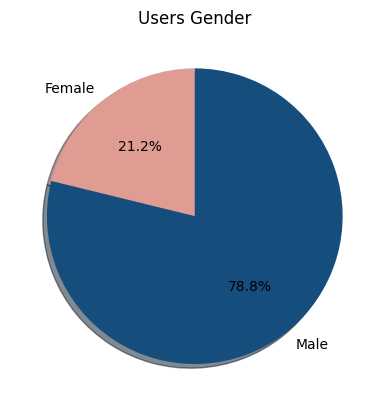

In [51]:
gender_df = df.groupby(['gender']).agg({'gender':'count'}).rename(columns={'gender':'gender_count'}).reset_index()

fig, ax = plt.subplots()

plt.pie(gender_df['gender_count'], labels = gender_df['gender'], autopct='%1.1f%%',colors=['#E09B93','#154D7C'],shadow=True,startangle=90)
plt.title("Users Gender")

###5.1.2 Count of users according to gender and whether they have any type of subscription.

In [52]:
user_typedf = df.groupby(['gender','usertype']).agg({'gender':'count'}).rename(columns={'gender':'count_by_gender'}).reset_index()
user_typedf.sort_values(by ='count_by_gender', ascending = False)
user_typedf.head()

,gender,usertype,count_by_gender
0,Female,Subscriber,75625
1,Male,Customer,98
2,Male,Dependent,4
3,Male,Subscriber,281483


In [53]:
fig = px.bar(user_typedf, y=user_typedf['usertype'], x=user_typedf['count_by_gender'], title='Usertype Divided by Gender',color="gender")
fig.update_layout(width = 600, height = 400)
fig.update_xaxes(title_text="Gender Count")
fig.update_yaxes(title_text="User Type")
fig.show()

###5.1.3 Average user age

Text(0.5, 1.0, 'Average User Age')

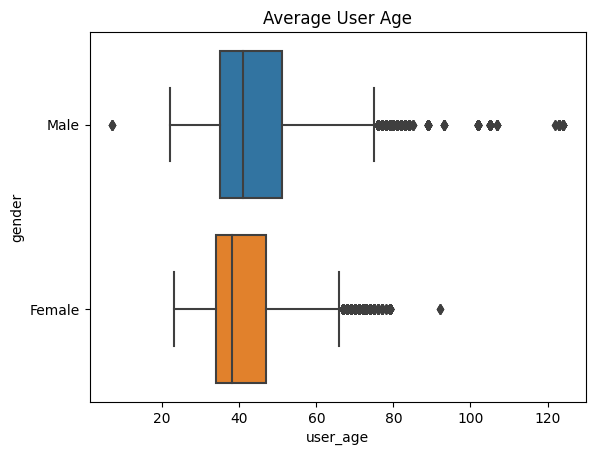

In [54]:
fig = sns.boxplot(df,x='user_age', y = 'gender')
plt.title('Average User Age')

##5.2 Monthly Trips Recorded

In [55]:
fig = px.bar(df,x=df['month'].value_counts().keys(),y=df['month'].value_counts(), text = df['month'].value_counts(),title='Monthly Trips Recorded',color_discrete_sequence=["darkcyan"])
fig.update_layout(width = 600, height = 400)
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Count")
fig.show()

In [56]:
month_feb = df[df['month'] == 'February']
month_feb.head(2)

,trip_id,start_time,end_time,bikeid,tripduration_minutes,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,user_age,day,month,tvl_started_hr
153406,13328853,2017-02-28 23:58:34,2017-03-01 00:01:00,3368,3,423,University Ave & 57th St,426,Ellis Ave & 60th St,Subscriber,Male,26,Tuesday,February,23
153407,13328852,2017-02-28 23:55:50,2017-03-01 00:01:00,3239,5,38,Clark St & Lake St,26,McClurg Ct & Illinois St,Subscriber,Female,39,Tuesday,February,23


### 5.2.2 Distribution of Trips by Days in February Month

In [57]:
month_feb['day_number'] = month_feb['start_time'].dt.day
trips_by_days= month_feb['day_number'].value_counts().reset_index()
trips_by_days.columns=['Days','Number of Trips']
trips_by_days=trips_by_days.sort_values(by='Days')

In [58]:
fig = px.histogram(trips_by_days,x=trips_by_days['Days'],y=trips_by_days['Number of Trips'], title='Distribution of Trips by Days in February Month', nbins = 31, color_discrete_sequence=["darkcyan"])
fig.update_layout(width = 700, height = 500)
fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Trips number")
fig.show()

###5.2.3 Trips per day grouped by month

In [59]:
MD_trips_df = df.groupby(['month','day']).agg({'day':'count'}).rename(columns={'day':'count_by_day'}).reset_index()
MD_trips_df.sort_values(by =['count_by_day','day'], ascending = False)
MD_trips_df.head(2)

,month,day,count_by_day
0,February,Friday,21139
1,February,Monday,25841


In [60]:
fig = px.bar(MD_trips_df, y=MD_trips_df['month'], x=MD_trips_df['count_by_day'], title='Trips Per Day Grouped by Month',color="day")
fig.update_layout(width = 600, height = 400)
fig.update_xaxes(title_text="Days Count")
fig.update_yaxes(title_text="Months")
fig.show()

##5.3 Daily Trips Recorded

In [61]:
fig = px.bar(df,x=df['day'].value_counts().keys(),y=df['day'].value_counts(), text= df['day'].value_counts(),title='Daily Trips Recorded',color_discrete_sequence=["darkcyan"])
fig.update_layout(width = 600, height = 400)
fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Count")
fig.show()

##5.4 Trips Through the Hours

In [62]:
hour = df['tvl_started_hr'].value_counts().reset_index()
hour.columns = ['Hour', 'Count']
hour= hour.sort_values(by='Hour')

In [63]:
fig = px.bar(hour,x=hour['Hour'],y=hour['Count'],text = 'Count',title='Trips Through the Hours',color_discrete_sequence=["darkcyan"])
fig.update_layout(width = 700, height = 500)
fig.update_xaxes(title_text="Hours")
fig.update_yaxes(title_text="Number of trips")
fig.show()

Categorizar a Usuarios subscriptores y normales por separado en base a sus viajes en minutos (tripduration_minutes). para saber cual es la diferencia entre un subscriptor y un usuario normal en cuestion del uso. ej 0-150,151 - 300 ->> como string

### 5.4.2 Difference in usage in minutes between Customer and Subscriber

In [64]:
tp_minutes_subs_df = pd.DataFrame()
tp_minutes_subs_df['Subscriber'] = df['usertype']
tp_minutes_subs_df = tp_minutes_subs_df[tp_minutes_subs_df['Subscriber'] == 'Subscriber']
tp_minutes_subs_df['tripduration_minutes'] = df['tripduration_minutes']
#-----------------------------------------------------------------------------------------
tp_minutes_Cust_df = pd.DataFrame()
tp_minutes_Cust_df['Customer'] = df['usertype']
tp_minutes_Cust_df = tp_minutes_Cust_df[tp_minutes_Cust_df['Customer'] == 'Customer']
tp_minutes_Cust_df['tripduration_minutes'] = df['tripduration_minutes']

In [65]:
bins = [0, 300, 600, 900, 1200, 1500]
labels = ['0-300', '301-600', '601-900','901-1200','1201-1500']
tp_minutes_subs_df['Categoria'] = pd.cut(tp_minutes_subs_df['tripduration_minutes'], bins=bins, labels=labels)
tp_minutes_subs_df['Categoria'] = tp_minutes_subs_df['Categoria'].astype(str)
#--------------------------------------------------------------------------------------------------------------
bins2 = [0, 125, 250, 400, 550]
labels2 = ['0-125', '126-250', '251-400','401-550']
tp_minutes_Cust_df['Categoria'] = pd.cut(tp_minutes_Cust_df['tripduration_minutes'], bins=bins2, labels=labels2)
tp_minutes_Cust_df['Categoria'] = tp_minutes_Cust_df['Categoria'].astype(str)

In [66]:
test_df = tp_minutes_subs_df.groupby(['Categoria']).agg({'Subscriber':'count'}).rename(columns={'Subscriber':'count_sub_'}).reset_index()
test_df.sort_values(by =['count_sub_'], ascending = False)
#----------------------------------------------------------------------------------------------------------------------------------------
test_df1 = tp_minutes_Cust_df.groupby(['Categoria']).agg({'Customer':'count'}).rename(columns={'Customer':'count_cust_'}).reset_index()
test_df1.sort_values(by =['count_cust_'], ascending = False)

,Categoria,count_cust_
0,0-125,97
1,401-550,1


In [67]:
from plotly.subplots import make_subplots

fig1 = px.bar(test_df, x=test_df['Categoria'], y=test_df['count_sub_'])
#-------------------------------------------------------------------------------------------------------------
fig2 = px.bar(test_df1, x=test_df1['Categoria'], y=test_df1['count_cust_'])

fig = make_subplots(rows=1, cols=2,subplot_titles=("Subscriber", "Customer"))
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.update_layout(width = 700, height = 500, title_text="Customer count by category according to service usage in minutes",title_x = 0.5)
fig.update_xaxes(title_text="Minutes", row=1, col=1)
fig.update_xaxes(title_text="Minutes", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.show()

##5.5 Top 10 Stations Where People Start Their Travels

In [68]:
top_stations_count = df['from_station_name'].value_counts().head(10)
print(top_stations_count)

Clinton St & Washington Blvd    7437
Clinton St & Madison St         6079
Canal St & Adams St             5770
Canal St & Madison St           4700
Clinton St & Jackson Blvd       4629
Kingsbury St & Kinzie St        4573
Franklin St & Monroe St         3553
LaSalle St & Jackson Blvd       3497
Columbus Dr & Randolph St       3353
Clinton St & Lake St            3158
Name: from_station_name, dtype: int64


In [69]:
fig = px.bar(df,x=df['from_station_name'].value_counts().head(10).keys(),y=df['from_station_name'].value_counts().head(10), text = df['from_station_name'].value_counts().head(10), color_discrete_sequence=["orange", "red"],title='Top 10 Stations Where People Start Their Travels')
fig.update_xaxes(title_text="Stations")
fig.update_yaxes(title_text="Count")
fig.update_layout(width = 600, height = 400)
fig.show()

###5.5.2 Top 10 Stations Where People Ends Their Travels

In [70]:
top_end_stations_count = df['to_station_name'].value_counts().head(10)
print(top_end_stations_count)

Clinton St & Washington Blvd    7487
Clinton St & Madison St         6453
Canal St & Adams St             5299
Canal St & Madison St           4999
Clinton St & Jackson Blvd       4758
Kingsbury St & Kinzie St        4602
LaSalle St & Jackson Blvd       3541
Michigan Ave & Washington St    3464
Clinton St & Lake St            3349
Franklin St & Monroe St         3305
Name: to_station_name, dtype: int64


In [71]:
fig = px.bar(df,x=df['to_station_name'].value_counts().head(10).keys(),y=df['to_station_name'].value_counts().head(10), text=df['to_station_name'].value_counts().head(10), color_discrete_sequence=["darkcyan"],title='Top 10 Stations Where People Ends Their Travels')
fig.update_xaxes(title_text="Stations")
fig.update_yaxes(title_text="Count")
fig.update_layout(width = 600, height = 400)
fig.show()